In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import bnlearn as bn
from math import log

In [2]:
df = pd.read_csv(r'C:/Users/Jordan/Desktop/jupyter notebook/Dissertation Code/data_cleaned_and_Explored.csv')
df.head()

,Unnamed: 0,year,manufacturer,model,description,euro_standard,engine_capacity,urban_metric,extra_urban_metric,co2,co,fuel_12k_miles,transmission,fueltype,c_o
0,0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,1600,11.1,6.5,195,980,1236,0,0,6.887553
1,1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,1700,11.5,6.6,200,1105,1266,0,0,7.007601
2,2,2000,Alfa Romeo,145 Range,Cloverleaf,2,2000,12.4,6.6,210,1103,1326,0,0,7.005789
3,3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,1600,11.3,6.6,195,980,1252,0,0,6.887553
4,4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,1700,11.5,6.6,200,1105,1266,0,0,7.007601


In [3]:
df = df.drop(columns = {'manufacturer', 'model', 'description', 'c_o', 'extra_urban_metric'})
df.shape

(44679, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44679 entries, 0 to 44678
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       44679 non-null  int64  
 1   year             44679 non-null  int64  
 2   euro_standard    44679 non-null  int64  
 3   engine_capacity  44679 non-null  int64  
 4   urban_metric     44679 non-null  float64
 5   co2              44679 non-null  int64  
 6   co               44679 non-null  int64  
 7   fuel_12k_miles   44679 non-null  int64  
 8   transmission     44679 non-null  int64  
 9   fueltype         44679 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 3.4 MB


Index(['Unnamed: 0', 'year', 'euro_standard', 'engine_capacity',
       'urban_metric', 'co2', 'co', 'fuel_12k_miles', 'transmission',
       'fueltype'],
      dtype='object')

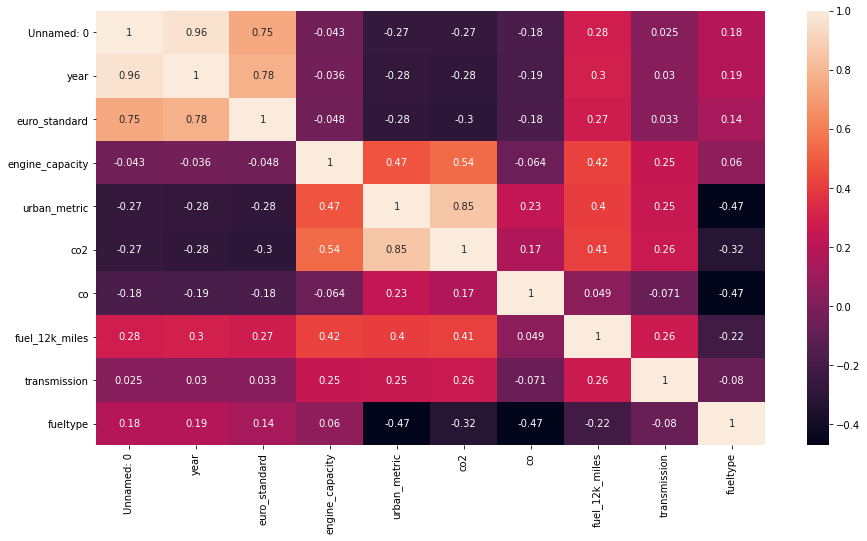

In [5]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

# Analysis

In [12]:
df['co22'] = np.log(df['co2'])
df['um'] = np.log(df['urban_metric'])
df['ec'] = np.log(df['engine_capacity'])
# df['f12km'] = np.log(df['fuel_12k_miles'])

# #Logarithym decreases R2 to 63%


In [39]:
X = df[['urban_metric']]
y = df['co2']

scaler = StandardScaler()
scaler.fit(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
#################
# Random Forest #
#################

RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
rf_pred = RFR.predict(X_test)

r2 = r2_score(y_test, rf_pred)*100
MAE = mean_absolute_error(y_test, rf_pred)*100
MSE = metrics.mean_squared_error(y_test, rf_pred)*100

print('R-Square Score:',r2)
print('Mean Absolute Error:',MAE)
print ('Mean Squared Error :',MSE)

R-Square Score: 94.0955160083981
Mean Absolute Error: 950.6119067503081
Mean Squared Error : 18406.53679637038


In [41]:
######
# LR #
######

# LR = LinearRegression()
# LR.fit(X_train, y_train)
# LR_pred = LR.predict(X_test)

# MSE = metrics.mean_squared_error(y_test, LR_pred)*100

# print ('Mean Squared Error :',MSE)

In [42]:
n = 33509 + 11170 
print(n)

44679


In [43]:
bic = n * log(MSE) + 2 * log(n)    #2 is number of params of X 
bic

438789.7978444908